In [213]:
from astropy.coordinates import EarthLocation
from astropy.utils import iers
from astropy.coordinates import get_body_barycentric,get_body_barycentric_posvel, get_body, get_moon
from astropy.utils import iers
from astropy.coordinates import get_body_barycentric,get_body_barycentric_posvel, get_body, get_moon
from astropy.coordinates import solar_system_ephemeris
from astropy.coordinates import EarthLocation
from astropy import units
from astropy.coordinates import CartesianRepresentation, CartesianDifferential, SkyCoord, GCRS
from math import acos, cos
from astropy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np

import astropy
import astropy.coordinates
from astropy.time import Time
from importlib import reload  
from math import ceil
import prog
from prog import DopplerSystemEME, get_earth_location_grid
import os


In [299]:
#Setup Environment
from importlib import reload  
reload(prog)
from prog import DopplerSystemEME

iers.conf.iers_auto_url = 'ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
solar_system_ephemeris.set('jpl') 


<ScienceState solar_system_ephemeris: 'jpl'>

In [300]:
#Setup Doppler Instance
start_string = '2020-01-01T00:00:00.00Z'
timestep = units.Quantity('15 min')
timespan = units.Quantity('24 hour')
emitters = [EarthLocation.from_geodetic(lat = "38°25'53.6", lon = "-79.839896°", height=0), 
           EarthLocation.from_geodetic(lat = "58°25'53.6", lon = "-50.839896°", height=0)]

reciever = EarthLocation.from_geodetic(lat = "38°25'53.6", lon ="-79°49'08.9", height=0)

start_time = Time(start_string, format='isot', scale='utc')
doppler_system = DopplerSystemEME(emitters, reciever, start_time, timestep, timespan, only_visible = True, signal=10e6)

In [301]:
#Calculate and save
doppler_system.update()
doppler_system.save_plots('demo2/')

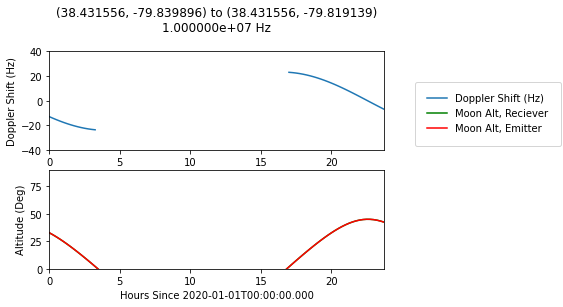

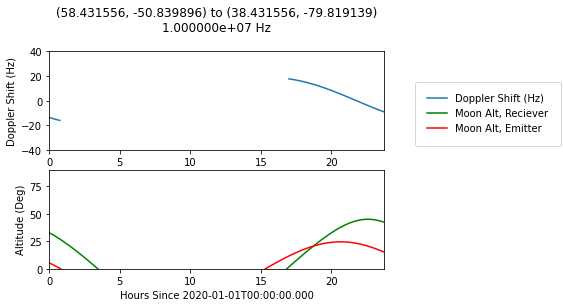

In [302]:
doppler_system.get_plot(0)
doppler_system.get_plot(1)

In [241]:
#Same, but with many emitters around Earth
emitters, grid = get_earth_location_grid(90)
reciever = EarthLocation.from_geodetic(lat = "38°25'53.6", lon ="-79°49'08.9", height=0) #GBT
start_string = '2020-01-01T00:00:00.00Z'
timestep = units.Quantity('15 min')
timespan = units.Quantity('4 hour')
start_time = Time(start_string, format='isot', scale='utc')
doppler_system2 = DopplerSystemEME(emitters, reciever, start_time, timestep, timespan, only_visible = True)

In [12]:
doppler_system2.update()
doppler_system2.save_plots('demo3/')

MemoryError: In RendererAgg: Out of memory

MemoryError: In RendererAgg: Out of memory

<Figure size 432x288 with 2 Axes>

In [ ]:
def is_local_min(signal, dopplers, idx, n):
    
    
    

def get_closest(a, b):
    m = 99999999
    ind = -1
    c = b-a 
    for i in range(0, len(emitters)):
        count = np.count_nonzero(~np.isnan(c))
        if count >2:
            err  = np.nansum(np.abs(c[i]))/count
            if err < m:
                ind = i
                m = err
    return ind